[https://www.kaggle.com/datasets/uciml/mushroom-classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)

## Libraries

In [1]:
import pandas as pd

## Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Zastosowanie pd.factorize do każdej kolumny
df = df.apply(lambda x: pd.factorize(x)[0])

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


## Train-test split

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='class')
y = df['class']

#### Dataset balance

In [11]:
y.value_counts()

class
1    4208
0    3916
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

# training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train,y_train)

y_pred=logmodel.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       782
           1       0.99      0.97      0.98       843

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



# KNN

KNN Accuracy:
K = 1: 1.00
K = 2: 1.00
K = 3: 1.00
K = 4: 1.00
K = 5: 1.00
K = 6: 1.00
K = 7: 1.00
K = 8: 1.00
K = 9: 1.00
K = 10: 1.00
K = 11: 1.00
K = 12: 1.00
K = 13: 1.00
K = 14: 1.00
K = 15: 1.00
K = 16: 1.00
K = 17: 1.00
K = 18: 0.99
K = 19: 0.99
K = 20: 0.99
K = 21: 0.99
K = 22: 0.99


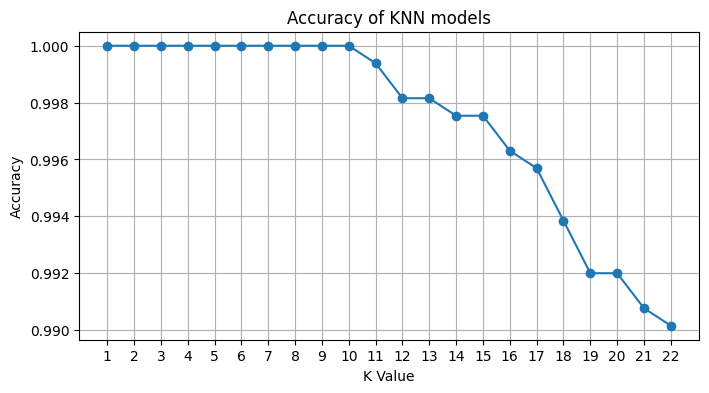

In [14]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Assuming X_train is your feature matrix
num_features = X_train.shape[1]

# Create a list of k values for KNN
k_values = list(range(1, num_features + 1))

# Train KNN models with different k values and store the results
knn_results = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_results[k] = {
        'model': knn_model,
        'y_pred': y_pred_knn,
        'accuracy': accuracy_score(y_test, y_pred_knn)
    }

print("KNN Accuracy:")
for k, result in knn_results.items():
    print(f"K = {k}: {result['accuracy']:.2f}")

# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuracies = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.grid(True)

# Set custom x-ticks for every value from 1 to the number of features
plt.xticks(range(1, num_features + 1))

plt.show()


In [15]:
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train,y_train)
print(classification_report(y_test,knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
import pickle

# Specify the file path where you want to save the model
filepath = 'models/knn_model.pkl'

with open(filepath, 'wb') as file:
    pickle.dump(knn_model, file)

filepath = 'models/reglog_model.pkl'

with open(filepath, 'wb') as file:
    pickle.dump(logmodel, file)